In [2]:
# K-means clustering is an unsupervised learning algorithm, groups unlabelled dataset into different clusters
# K defines the number of pre defined clusters needed to be created.
# Elbow method is one of the most popular ways to find the optimal number of clusters.
# WCSS value Within Cluster Sum of Squares to determines best number of clusters.
# K-means++ takes the central points or centoids far from each other

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv('IRIS.csv')
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [16]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
new_data = dataset.drop(columns=['species'])
new_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


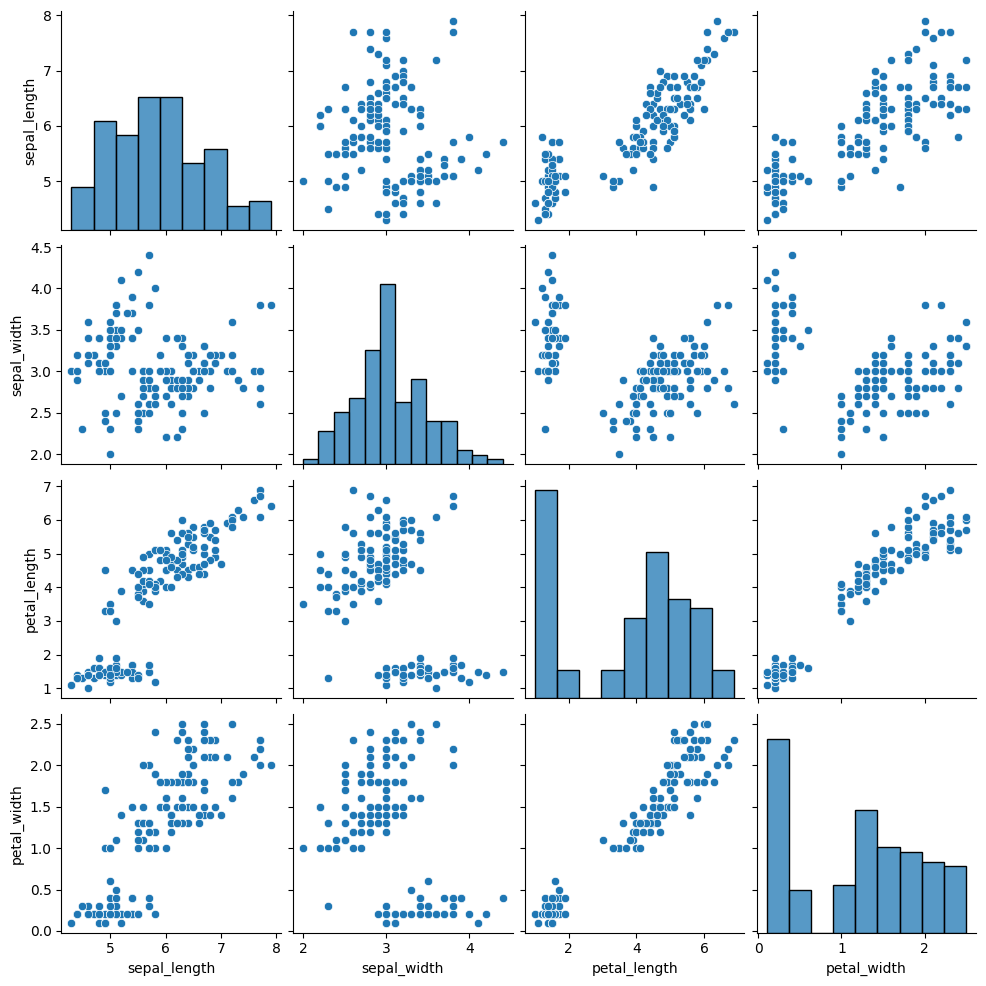

In [8]:
sns.pairplot(data=new_data)
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [11]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(new_data)
    wcss.append(km.inertia_)

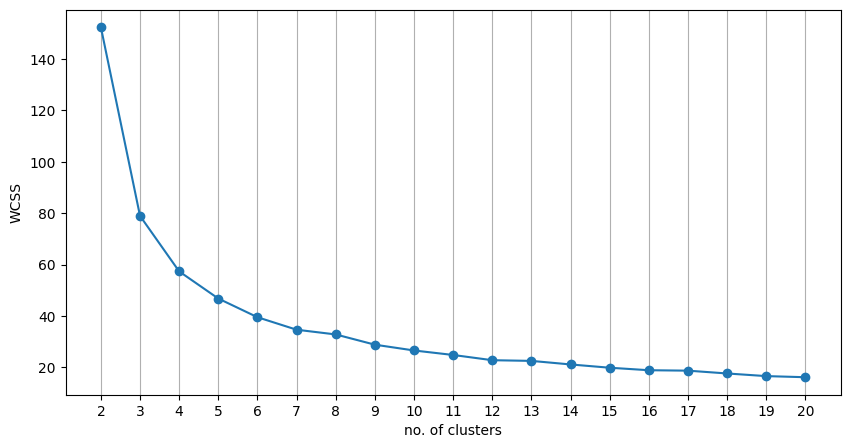

In [15]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)], wcss, marker='o')
plt.xlabel('no. of clusters')
plt.xticks([i for i in range(2,21)])
plt.ylabel('WCSS')
plt.grid(axis='x')
plt.show() #output show that 3 is the elbow point thus the best number for clusters

In [20]:
kmn = KMeans(n_clusters=3)
new_data['Predict'] = kmn.fit_predict(new_data)
new_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,Predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


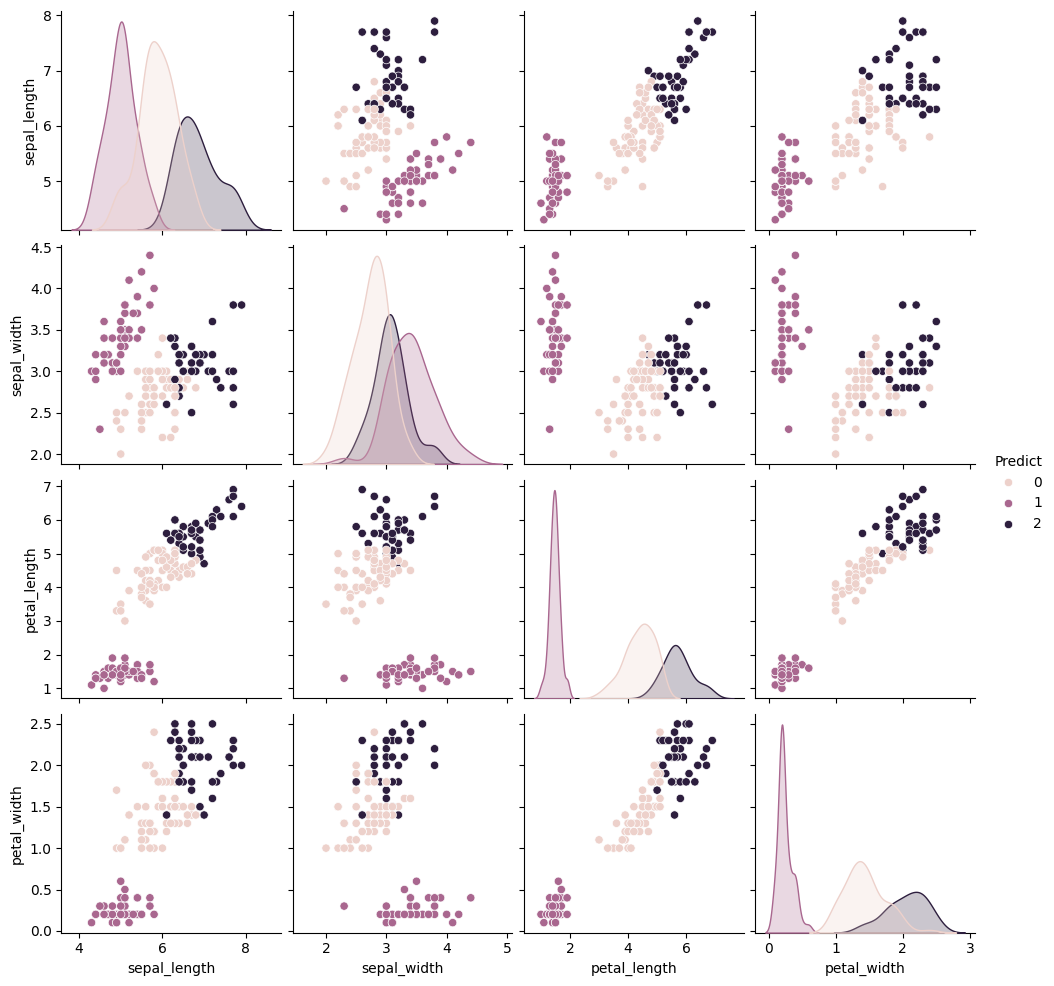

In [25]:
sns.pairplot(data=new_data, hue='Predict')
plt.savefig('Clustering_Clustered.jpg')
plt.show()

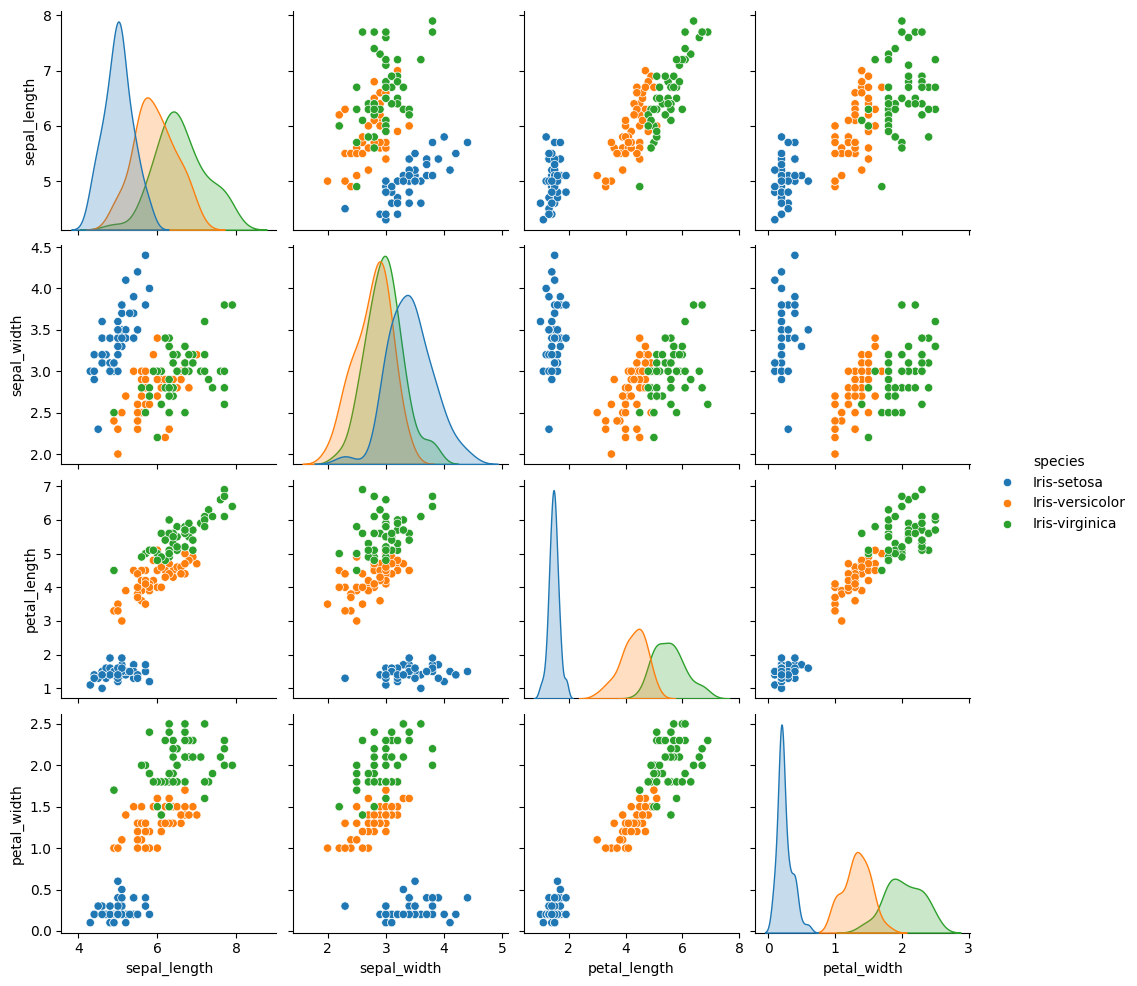

In [26]:
sns.pairplot(data=dataset, hue='species')
plt.savefig('Clusterting_org_graph.jpg')
plt.show()